# <span style="color:#F72585"><center>Reducción de dimensión por t-SNE</center></span>



<figure>
<center>
<img src="../Imagenes/ojo_dios.jpeg" width="400" height="400" align="center" /> 
</center>   
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:NGC7293_(2004).jpg">, Public domain, via Wikimedia Commons

## <span style="color:#4361EE">Referencias</span>

1. [van der Maaten, L.J.P.; Hinton, G.E. Visualizing Data using t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
1. [van der Maaten, L.J.P. t-Distributed Stochastic Neighbor Embedding](https://lvdmaaten.github.io/tsne/)
1. [Viualizing data using t-SNEViualizing data using t-SNE L.J.P. van der Maaten](https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE)
1. [Accelerating t-SNE using Tree-Based Algorithms](https://lvdmaaten.github.io/publications/papers/JMLR_2014.pdf)
1. [Kemal Erdem, t-SNE clearly explained](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a)

## <span style="color:#4361EE">Introducción</span>

t-SNE (t-distributed Stochastic Neighbor Embedding) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas e intenta minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o   SVD truncado para datos dispersos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de Laurens van der Maaten [Visualizing data using t-SNE](https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE).

Debe recordar que t-SNE es iterativo, por lo que, a diferencia de PCA, no puede aplicarlo en otro conjunto de datos. PCA utiliza la matriz de covarianza global para reducir los datos. Puede obtener esa matriz y aplicarla a un nuevo conjunto de datos con el mismo resultado. Eso es útil cuando necesita intentar reducir su lista de funciones y reutilizar la matriz creada a partir de los datos. t-SNE se usa principalmente para comprender datos de alta dimensión y proyectarlos en un espacio de baja dimensión (como 2D o 3D).
t-SNE (t-distributed Stochastic Neighbor Embedding) es una herramienta para visualizar datos de alta dimensión. Convierte las similitudes entre los puntos de datos en probabilidades conjuntas e intenta minimizar la divergencia de Kullback-Leibler entre las probabilidades conjuntas de la incrustación de baja dimensión y los datos de alta dimensión. t-SNE tiene una función de costo que no es convexa, es decir, con diferentes inicializaciones podemos obtener diferentes resultados.

Se recomienda utilizar otro método de reducción de dimensionalidad (por ejemplo, PCA para datos densos o   SVD truncado para datos dispersos) para reducir el número de dimensiones a una cantidad razonable (por ejemplo, 50) si el número de características es muy alto. Esto suprimirá algo de ruido y acelerará el cálculo de distancias por pares entre muestras. Para obtener más consejos, consulte las preguntas frecuentes de Laurens van der Maaten [Visualizing data using t-SNE](https://www.researchgate.net/publication/228339739_Viualizing_data_using_t-SNE).

Debe recordar que t-SNE es iterativo, por lo que, a diferencia de PCA, no puede aplicarlo en otro conjunto de datos. PCA utiliza la matriz de covarianza global para reducir los datos. Puede obtener esa matriz y aplicarla a un nuevo conjunto de datos con el mismo resultado. Eso es útil cuando necesita intentar reducir su lista de funciones y reutilizar la matriz creada a partir de los datos. t-SNE se usa principalmente para comprender datos de alta dimensión y proyectarlos en un espacio de baja dimensión (como 2D o 3D).


## <span style="color:#4361EE">¿Cómo trabaja t-SNE?</span> 

### <span style="color:#4CC9F0">Distribución de probabilidad </span>

Comencemos con SNE parte de t-SNE. Supongamos que  conjunto de datos es el ilustrado en el siguiente gráfico. Tenemos 3 clases diferentes y se pueden distinguir fácilmente entre sí. La primera parte del algoritmo es crear una distribución de probabilidad que represente similitudes entre vecinos. 


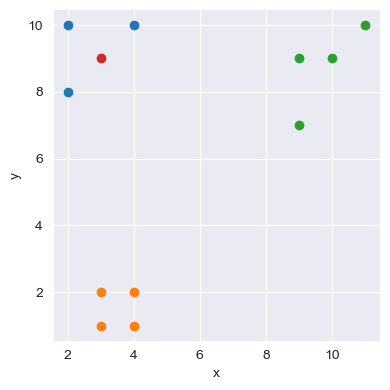

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# datos 
data = {'x': [2,2,3,4, 3,3,4,4,9,9,10,11], 'y': [8,10,9,10, 1,2,1,2,7,9,9,10], 
        'grupo':[0,0, 3,0,1,1,1,1,2,2,2,2]}
data = pd.DataFrame(data)

sns.set_style("darkgrid")
sns.FacetGrid(data,hue='grupo',height=4).map(plt.scatter,'x','y')#.add_legend()
plt.show()                                                           

El [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) establece que "la similitud del punto de datos $x_j$ con el punto de datos $x_i$ es la probabilidad condicional $p_{j|i} = P[x_j|x_i]$, de que $x_i$ elegiría a $x_j$ como su vecino". 

Elegimos  uno de los puntos del conjunto de datos. En la imagen será el punto rojo. Ahora tenemos que escoger otro punto y calcular la Distancia Euclidiana entre ellos $|x_i - x_j|$. 

En el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) se establece que esta distancia tiene que ser proporcional a la densidad de probabilidad bajo una distribución gaussiana centrada en $x_i$. 

Entonces, debemos generar una distribución gaussiana en donde similitud del punto de datos $x_j$ con el punto  $x_i$ es la probabilidad condicional $p_{j|i} = P[x_j|x_i]$, de que $x_i$ elegiría a $x_j$ como su vecino". 

Elegimos  uno de los puntos del conjunto de datos. En la imagen será el punto rojo. Ahora tenemos que escoger otro punto y calcular la Distancia Euclidiana entre ellos $|x_i - x_j|$. 

En el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) se establece que esta distancia tiene que ser proporcional a la densidad de probabilidad bajo una distribución gaussiana centrada en $x_i$. Entonces, debemos generar una distribución gaussiana con 



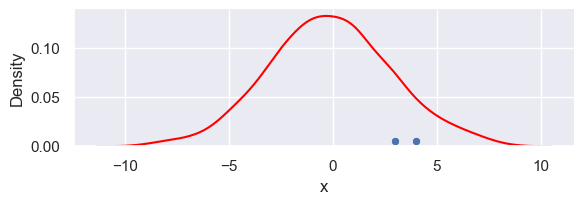

In [26]:
#make this example reproducible
np.random.seed(0)

#create data
x = np.random.normal(0, 3, size=1000)

#create normal distribution curve

dos = {'x':[3,4], 'y':[5e-3, 5e-3], 'grupo':[0,1]}
dos = pd.DataFrame(dos)

sns.displot(x, kind='kde', color = 'red', height=2, aspect=3)
sns.scatterplot(data=dos, x='x', y='y')
plt.show()
#dos

### <span style="color:#4CC9F0">Clústeres dispersos y varianza </span>

Hasta este punto, nuestros grupos estaban estrechamente delimitados dentro de su grupo. ¿Qué pasa si tenemos un nuevo clúster como se mostro inicialmente.

Puede distinguir entre puntos similares y no similares, pero los valores absolutos de probabilidad son mucho más pequeños que en el primer ejemplo (compare los valores del eje $Y$).

Podemos arreglar eso dividiendo el valor de proyección actual por la suma de las proyecciones.


$$
p_{j|i} = \frac{g(|x_i-x_j|)}{\sum_{k\ne i}g(|x_i-x_k|)} = \frac{\exp(||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}\exp(||x_i-x_k||^2/2\sigma_i^2)}
$$

Que si se aplica al primer ejemplo se verá algo así como:



### <span style="color:#4CC9F0">Manejo de diferentes distancias </span>

Si tomamos dos puntos e intentamos calcular la probabilidad condicional entre ellos, entonces los valores de $p_{i|j}$ y $p_{j|i}$ serán diferentes. 

La razón de esto es que provienen de dos distribuciones diferentes. ¿Cuál deberíamos elegir para el cálculo entonces?


$$
p_{ij} = \frac{p_{ij}+ p_{ji}}{2N},
$$

en donde $N$ es el número de dimensiones.

### <span style="color:#4CC9F0">Perplexity</span>

La varianza depende de la distribución Gaussiana  de cada grupo y del número de puntos que rodean el centro de la misma. Esta es la parte donde viene el valor de la perplejidad. Una perplejidad es más o menos un número objetivo de vecinos para nuestro punto central. Básicamente, cuanto mayor es la perplejidad, mayor es el valor de la varianza. Nuestro grupo “azul” está cerca uno del otro y si configuramos la perplejidad en 4, busca el valor correcto de para “encajar” a nuestros 4 vecinos. Si desea ser más específico, puede revisar el documento original:

SNE realiza una búsqueda binaria del valor de sigma que produce una distribución de probabilidad con una perplejidad fija que especifica el usuario

$$
Perp(P_i) = 2^{-\sum p_{j|i}\log p_{j|i}}.
$$

Observe que $-\sum p_{j|i}\log p_{j|i}$ es la entropía de Shannon.  Pero a menos que quiera implementar t-SNE usted mismo, lo único que necesita saber es que la perplejidad que elija se correlaciona positivamente con el valor de $\mu_i$ y para la misma perplejidad tendrá múltiples $\mu_i$ diferentes, según las distancias. El valor típico de perplejidad oscila entre 5 y 50. Por defecto,  el modelo t-SNE en la librería `scikit learn` de define este valor como 30.

### <span style="color:#4CC9F0">Crear un espacio de baja dimensión</span>

La siguiente parte de t-SNE es crear un espacio de baja dimensión con el mismo número de puntos que en el espacio original. Los puntos deben distribuirse al azar en un nuevo espacio. El objetivo de este algoritmo es encontrar una distribución de probabilidad similar en un espacio de baja dimensión. La opción más obvia para una nueva distribución sería usar la gaussiana nuevamente. 

Esa no es la mejor idea, desafortunadamente. Una de las propiedades de la distribución gaussiana es que tiene una "cola corta" y por eso crea un problema de hacinamiento. Para resolver eso vamos a usar la distribución t de Student con un solo grado de libertad. Más información sobre cómo se seleccionó esta distribución y por qué la gaussiana no es la mejor idea que puede encontrar en el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Ahora nuestra nueva fórmula se verá así: el modelo t-SNE en la librería `scikit learn` de define este valor como 30..
La siguiente parte de t-SNE es crear un espacio de baja dimensión con el mismo número de puntos que en el espacio original. Los puntos deben distribuirse al azar en un nuevo espacio. El objetivo de este algoritmo es encontrar una distribución de probabilidad similar en un espacio de baja dimensión. La opción más obvia para una nueva distribución sería usar la gaussiana nuevamente. 

Esa no es la mejor idea, desafortunadamente. Una de las propiedades de la distribución gaussiana es que tiene una "cola corta" y por eso crea un problema de hacinamiento. Para resolver eso vamos a usar la distribución t de Student con un solo grado de libertad. Más información sobre cómo se seleccionó esta distribución y por qué la gaussiana no es la mejor idea que puede encontrar en el [artículo original](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). Ahora nuestra nueva fórmula se verá así: el modelo t-SNE en la librería `scikit learn` de define este valor como 30..


$$
q_{j|i} =  \frac{(1+||y_i-y_j||^2 )^{-1}}{\sum_{k\ne i}(1+||y_i-y_k||^2 )^{-1}}
$$


### <span style="color:#4CC9F0">Optimización: Gradiente descendiente</span>

EL problema que resta resolver, es encontrar los puntos $y_i$ en el espacio de proyección. Para lograrlo, se usa la divergencia de Kullback-Leibler  entre la distribución de referencia $p_{j|i}$ y la distribución aproximante   $q_{j|i}$, que denotamos $\mathcal{D}_{KL}(P||Q) $. Recuerde que

EL problema que resta resolver, es encontrar los puntos $y_i$ en el espacio de proyección. Para lograrlo, se usa la divergencia de Kullback-Leibler  entre la distribución de referencia $p_{j|i}$ y la distribución aproximante   $q_{j|i}$, que denotamos $\mathcal{D}_{KL}(P||Q) $. Recuerde que


$$
\mathcal{D}_{KL}(P||Q) = \sum_{x \in \mathcal{X}} p(x) \log \left(\frac{P(x)}{Q(x)}\right).
$$

No vamos a desarrollar los detalles matemáticos, solamente mostramos el cálculo del gradiente:

$$
\frac{\partial \mathcal{D}}{\partial y_j} = 4\sum_{j}(p_{ij}- q_{ij})(y_i-y_j)(1+ ||y_i - y_j||^2)^{-1}.
$$

#### <span style="color:#4CC9F0">Ejercicio</span>

Verifique la ecuación anterior.

### <span style="color:#4CC9F0">Algortimo básico t-SNE</span>

 Algoritmo:  versión simple de incrustación de vecinos estocásticos distribuidos en t.
1. **Datos**: conjunto de datos $\mathcal{X} = \{x_1, x_2,\ldots, x_n\}$,
1. **Función de pérdida**: divergencia KL $\mathcal{D}_{KL}(P||Q) = \sum_{x \in \mathcal{X}} p(x) \log \left(\frac{P(x)}{Q(x)}\right)$.
1. **Parámetros de optimización**: número de iteraciones $T$, tasa de aprendizaje $\eta$ , momento $\alpha(t)$.
1. **Resultado**: representación de datos de baja dimensión $\mathcal{Y}^{(T)}= \{y_1, y_2,\ldots, y_n\}$
1. **Perplexity**: defina $\text{Perp}(P_i) = 2^{-\sum p_{j|i}\log p_{j|i}}$.
1. **Gradiente**: defina $\frac{\partial \mathcal{D}}{\partial y_j} = 4\sum_{j}(p_{ij}- q_{ij})(y_i-y_j)(1+ ||y_i - y_j||^2)^{-1}$.
1. **Afinidad en espacio original**: defina $p_{j|i} =  \frac{\exp(||x_i-x_j||^2/2\sigma_i^2)}{\sum_{k\ne i}\exp(||x_i-x_k||^2/2\sigma_i^2)}$.
1. **Afinidad en espacio de proyección (embedding)**: defina $q_{j|i} =  \frac{(1+||y_i-y_j||^2 /2\sigma_i^2)^{-1}}{\sum_{k\ne i}(1+||y_i-y_k||^2 /2\sigma_i^2)^{-1}}.$
1. Inicio
    1. calcule las afinidades por pares $p_{j|i}$ con perplejidad Perp (usando la Ecuación 5)
    1. definir $p_{ij} = \frac{p_{j|i}+p_{i| j}}{2n}$
    1. solución inicial una muestra $\mathcal{Y}^{(0)}= \{y_1, y_2,\ldots, y_n\}$ de la distribución gaussiana $N (0,10−4)$
    1. para $t=1,2,\ldots,T$ hacer:
        1. calcular afinidades de baja dimensión $q_{ij}$ (usando la Ecuación 8)
        1. calcular el gradiente $\frac{\partial \mathcal{D}}{\partial \mathbf{y}}$ (usando la Ecuación 6)
        1. actualizar  $\mathcal{Y}^{(t)} = \mathcal{Y}^{(t-1)} + \eta \frac{\partial \mathcal{D}}{\partial \mathbf{y}} + \alpha(y)(\mathcal{Y}^{(t-1)}-\mathcal{Y}^{(t-2)})$ 
        1. fin
    1. fin
    
En los experimentos de los autores, $\alpha(t)=0.5$ para $t<250$ y $\alpha(t)=0.8$ para $t\ge 250$.

## <span style="color:#4361EE">Ejemplo con los dígitos </span>

En este ejemplo tomamos  el dataset `digits` de los datasets de scikit learn. 

Cada punto de datos es una imagen de 8x8 de un dígito.

* Clases: 10
* Muestras por clase: ~180
* Muestras totales: 1797
* dimensionalidad: 64
* características:  números enteros 0-16


(1797, 64)


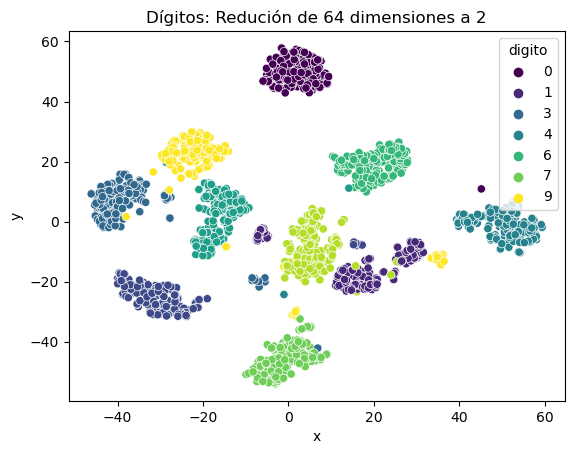

In [5]:
# librerías
from sklearn.datasets import load_digits
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn  as sns
import pandas as pd

# datos
digits = load_digits()
print(digits.data.shape)
# (1797, 64)

# embedding
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='pca', perplexity=30).fit_transform(digits.data)
#plot
data_plot = pd.DataFrame(X_embedded)
data_plot.columns = ['x','y']
data_plot['digito'] = digits.target
data_plot
sns.scatterplot(data=data_plot, x='x', y='y', hue='digito', palette='viridis').set(title='Dígitos: Redución de 64 dimensiones a 2')
plt.show()